# PREPARATION

In [1]:
import gzip, idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# FIX CONSTANT
CLASS = 10
THRESH = 100
MAX_EPOCHS = 50
N_SAMPLE_PLOT = 10

# LOAD DATA

In [3]:
# LOAD TRAIN AND TEST DATA
data = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

for idx, filename in enumerate(data):
     with gzip.open('dataset/' + filename, 'rb') as f:
        temp = f.read()
        data[idx] = idx2numpy.convert_from_string(temp)

[X_train, y_train_label, X_test, y_test_label] = data
# print Train and Test data size
print('Train:', X_train.shape, y_train_label.shape)
print('Test: ', X_test.shape, y_test_label.shape)

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


Each sample data is 28x28 pixel of handwritten image, convert to numpy array consist of integer between 0-255

# PREPROCESSING

In [4]:
def thresholding(x, thresh):
    """Masking image for simplify data.
    Convert data to binary, each pixel greater or equal to threshold will convert as 1
    """
    if x >= thresh:
        temp = 1
    else:
        temp = 0
    return temp
thresholding_v = np.vectorize(thresholding)

In [5]:
# Masking feature data
X_train = thresholding_v(X_train, THRESH)
X_test = thresholding_v(X_test, THRESH)

# One hot encode label data
y_train = np.eye(CLASS)[y_train_label]
y_test = np.eye(CLASS)[y_test_label]

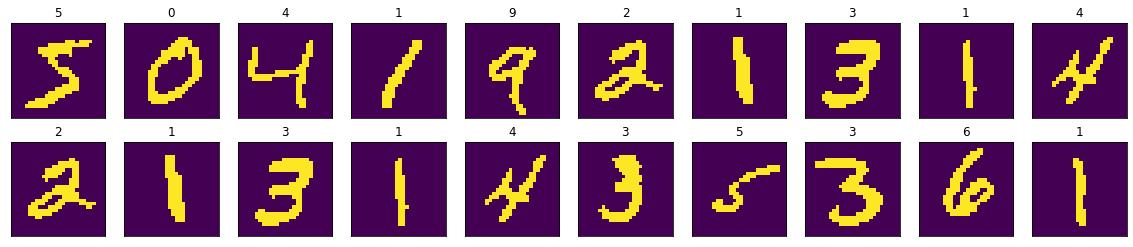

In [6]:
# Plot some sample
n = N_SAMPLE_PLOT
fig, ax = plt.subplots(2, n, sharex=False, sharey=False, figsize=(n*2,4))
for i in range(2):
    for j in range(n):
        ax[i,j].imshow(X_train[i*5 + j])
        ax[i,j].set_title(y_train_label[i*5 + j])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

In [7]:
# Reshape each sample to 1 dimension
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [8]:
# print Train and Test data size
print('            X           y')
print('Train:', X_train.shape, y_train_label.shape)
print('Test: ', X_test.shape, y_test_label.shape)

            X           y
Train: (60000, 784) (60000,)
Test:  (10000, 784) (10000,)


# TRAIN MODEL

In [9]:
# CREATE MODEL 
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(CLASS, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, validation_data=(X_test, y_test), verbose=0)

In [11]:
print ("train score: ",round(model.evaluate(X_train, y_train)[1]*100, 2) , "%")
print ("test score : ",round(model.evaluate(X_test, y_test)[1]*100, 2) , "%")

60000/60000 [==============================] - 2s 37us/step
train score:  99.18 %
10000/10000 [==============================] - 0s 38us/step
test score :  94.85 %


In [12]:
model.save('model.h5')

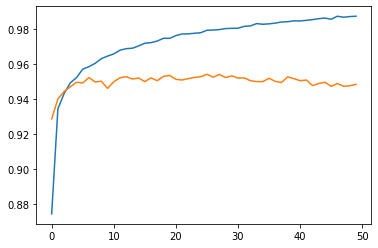

In [13]:
# Plot accuracy train vs test data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])